In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

In [2]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [3]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

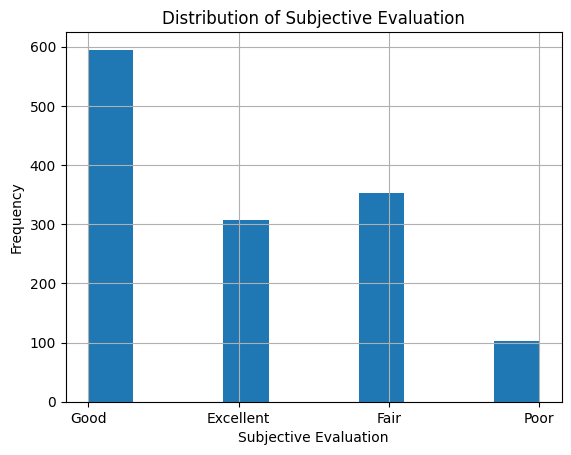

In [4]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [5]:
# accuracy of 'objective evaluation' (relative to the target, 'subjective evaluation')
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

Accuracy of objective evaluation: 0.5876288659793815


In [6]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

Categorical columns: []


In [7]:
mapping = {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}

SBC reduction of train set
number of features:  22
original num target classes:  4
original num observations:  1018
using provided mapping:  {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}
new num features:  23
new num target classes:  2
new num observations:  3054  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
1  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
2  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
3  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   
4  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   

          7         8         9  ...        14        15        16        17  \
0  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.067678   
1  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.06767

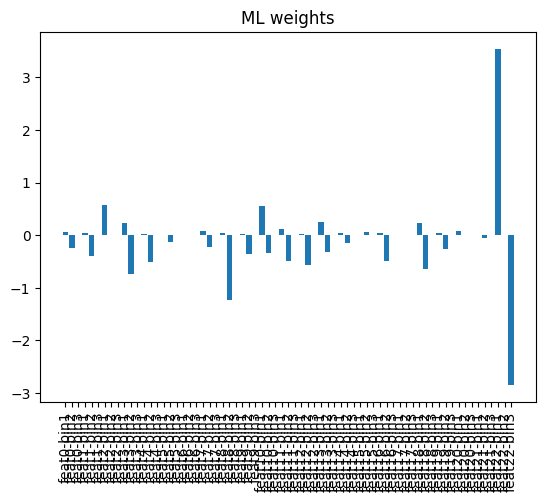

num of zero weights:  31
num of non-zero weights:  38
        Feature    Weight
0    feat0-bin1  0.055713
1    feat0-bin2 -0.237738
3    feat1-bin1  0.042246
4    feat1-bin2 -0.388635
6    feat2-bin1  0.576694
9    feat3-bin1  0.224756
10   feat3-bin2 -0.745595
12   feat4-bin1  0.018210
13   feat4-bin2 -0.515170
16   feat5-bin2 -0.122081
21   feat7-bin1  0.089877
22   feat7-bin2 -0.228234
24   feat8-bin1  0.048006
25   feat8-bin2 -1.233799
27   feat9-bin1  0.015981
28   feat9-bin2 -0.349990
30  feat10-bin1  0.553734
31  feat10-bin2 -0.343421
33  feat11-bin1  0.115098
34  feat11-bin2 -0.485488
36  feat12-bin1  0.016535
37  feat12-bin2 -0.568392
39  feat13-bin1  0.246362
40  feat13-bin2 -0.310336
42  feat14-bin1  0.047755
43  feat14-bin2 -0.149837
46  feat15-bin2  0.071087
48  feat16-bin1  0.036629
49  feat16-bin2 -0.491277
54  feat18-bin1  0.223525
55  feat18-bin2 -0.650793
57  feat19-bin1  0.034985
58  feat19-bin2 -0.253075
60  feat20-bin1  0.075855
63  feat21-bin1  0.003227
64  feat21

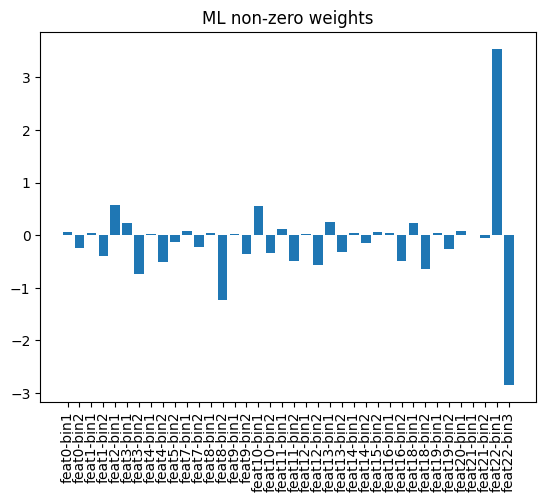


evaluate
encoding test set
X_disc shape:  (1020, 69)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin2', 'feat0-bin3', 'feat1-bin1', 'feat1-bin2',
       'feat1-bin3', 'feat2-bin1', 'feat2-bin2', 'feat2-bin3', 'feat3-bin1',
       'feat3-bin2', 'feat3-bin3', 'feat4-bin1', 'feat4-bin2', 'feat4-bin3',
       'feat5-bin1', 'feat5-bin2', 'feat5-bin3', 'feat6-bin1', 'feat6-bin2',
       'feat6-bin3', 'feat7-bin1', 'feat7-bin2', 'feat7-bin3', 'feat8-bin1',
       'feat8-bin2', 'feat8-bin3', 'feat9-bin1', 'feat9-bin2', 'feat9-bin3',
       'feat10-bin1', 'feat10-bin2', 'feat10-bin3', 'feat11-bin1',
       'feat11-bin2', 'feat11-bin3', 'feat12-bin1', 'feat12-bin2',
       'feat12-bin3', 'feat13-bin1', 'feat13-bin2', 'feat13-bin3',
       'feat14-bin1', 'feat14-bin2', 'feat14-bin3', 'feat15-bin1',
       'feat15-bin2', 'feat15-bin3', 'feat16-bin1', 'feat16-bin2',
       'feat16-bin3', 'feat17-bin1', 'feat17-bin2', 'feat17-bin3',
       'feat18-bin1', 'feat18-bin2', 'feat18-bin3', 'feat19-bin1'

In [8]:
start_time = time.time()

scorecard = Scorecard()
caim_1ook_ml_model, caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping)

#scorecard.cross_val_score()
mse, caim_accuracy = scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [9]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 38


SBC reduction of train set
number of features:  22
original num target classes:  4
original num observations:  1018
using provided mapping:  {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}
new num features:  23
new num target classes:  2
new num observations:  3054  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
1  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
2  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
3  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   
4  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   

          7         8         9  ...        14        15        16        17  \
0  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.067678   
1  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.06767

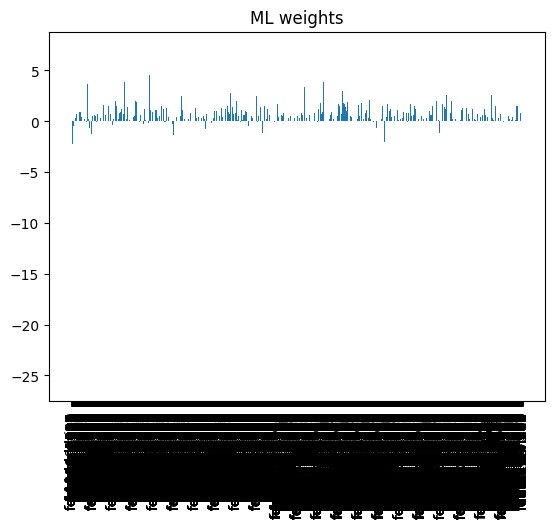

num of zero weights:  6301
num of non-zero weights:  16075
             Feature     Weight
0         feat0-bin1   0.162484
1        feat0-bin10   0.510720
2       feat0-bin100   0.514716
3      feat0-bin1000  -0.338875
4      feat0-bin1001  -0.170994
...              ...        ...
22370  feat21-bin996  -0.520541
22371  feat21-bin997   0.418444
22373  feat21-bin999  -1.265432
22374    feat22-bin1 -11.988472
22375    feat22-bin2 -25.881921

[16075 rows x 2 columns]


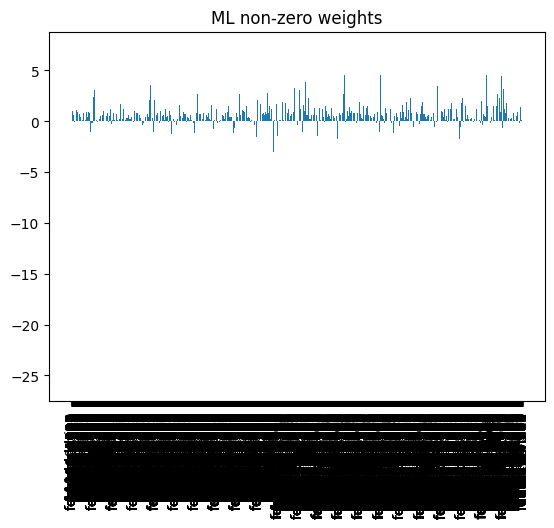


evaluate
encoding test set
X_disc shape:  (1020, 22376)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin10', 'feat0-bin100', 'feat0-bin1000',
       'feat0-bin1001', 'feat0-bin1002', 'feat0-bin1003', 'feat0-bin1004',
       'feat0-bin1005', 'feat0-bin1006',
       ...
       'feat21-bin992', 'feat21-bin993', 'feat21-bin994', 'feat21-bin995',
       'feat21-bin996', 'feat21-bin997', 'feat21-bin998', 'feat21-bin999',
       'feat22-bin1', 'feat22-bin2'],
      dtype='object', length=22376)
X_disc head:     feat0-bin1  feat0-bin10  feat0-bin100  feat0-bin1000  feat0-bin1001  \
0           0            0             0              0              0   
1           0            0             0              0              0   
2           0            0             0              0              0   
3           0            0             0              0              0   
4           0            0             0              0              0   

   feat0-bin1002  feat0-bin1003  feat0-bin1004 

In [10]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                mapping=mapping,
                num_nonzero_weights=num_nonzero_weights)

_, infbins_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

CAIM, accuracy: 0.49411764705882355, sparsity: 38
threshold: 0.1, accuracy: 0.7421568627450981, sparsity: 13818
threshold: 0.01, accuracy: 0.7450980392156863, sparsity: 15634
threshold: 0.001, accuracy: 0.7450980392156863, sparsity: 15901
threshold: 0.0001, accuracy: 0.7450980392156863, sparsity: 15922
threshold: 0, accuracy: 0.7450980392156863, sparsity: 16075
infbins, accuracy: 0.4441176470588235, sparsity: 16075


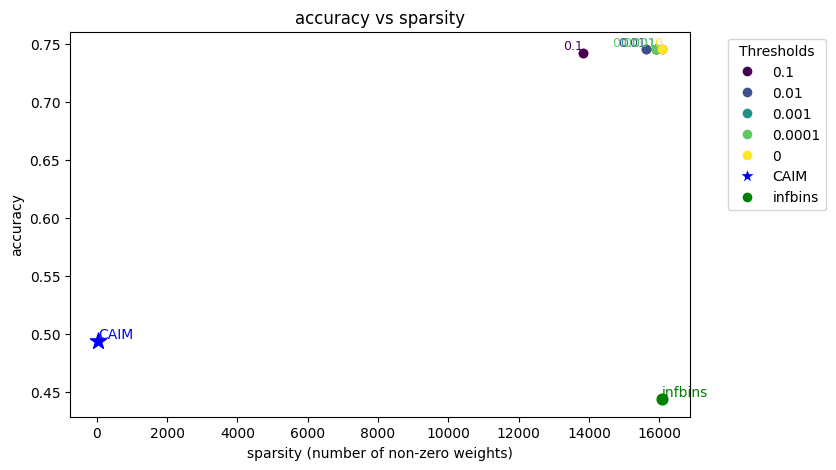

In [11]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights, infbins_accuracy, scorecard.nonzero_weights.shape[0])

SBC reduction of train set
number of features:  22
original num target classes:  4
original num observations:  1018
using provided mapping:  {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}
new num features:  23
new num target classes:  2
new num observations:  3054  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
1  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
2  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
3  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   
4  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   

          7         8         9  ...        14        15        16        17  \
0  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.067678   
1  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.06767

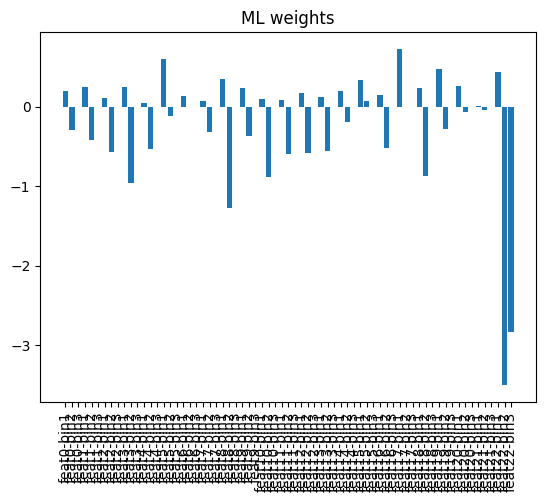

num of zero weights:  24
num of non-zero weights:  45
        Feature    Weight
0    feat0-bin1  0.191861
1    feat0-bin2 -0.289415
3    feat1-bin1  0.250509
4    feat1-bin2 -0.425404
6    feat2-bin1  0.101469
7    feat2-bin2 -0.570471
9    feat3-bin1  0.248794
10   feat3-bin2 -0.964276
12   feat4-bin1  0.043898
13   feat4-bin2 -0.530618
15   feat5-bin1  0.603164
16   feat5-bin2 -0.119596
18   feat6-bin1  0.130017
21   feat7-bin1  0.067439
22   feat7-bin2 -0.315726
24   feat8-bin1  0.342369
25   feat8-bin2 -1.274659
27   feat9-bin1  0.227204
28   feat9-bin2 -0.366320
30  feat10-bin1  0.089693
31  feat10-bin2 -0.891486
33  feat11-bin1  0.079024
34  feat11-bin2 -0.593192
36  feat12-bin1  0.171361
37  feat12-bin2 -0.581305
39  feat13-bin1  0.118260
40  feat13-bin2 -0.552782
42  feat14-bin1  0.201077
43  feat14-bin2 -0.195551
45  feat15-bin1  0.339844
46  feat15-bin2  0.070301
48  feat16-bin1  0.146336
49  feat16-bin2 -0.524367
51  feat17-bin1  0.725567
54  feat18-bin1  0.238581
55  feat18

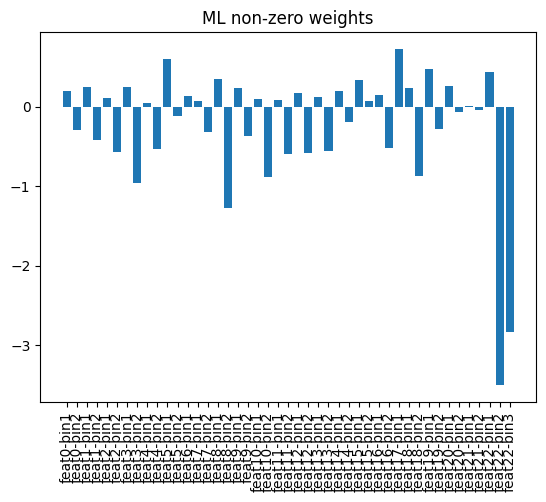


evaluate
encoding test set
[[1 0 0]
 [1 0 0]
 [1 1 0]
 ...
 [1 1 0]
 [1 1 0]
 [1 1 0]]
predicted labels (before mapping):  [1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 0 2 2 2 0 2 2 1 2 2 2 2 2 2 2 1 2 1 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 1 2 1 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2
 2 2 0 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 1 1 2 2 2 2 1 2 2 2 1 2 2 1 2 1
 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 1 1 2 2 2 1 1 2
 2 1 1 1 1 2 0 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 0 1 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 1 1 2 0 2 1 1 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 0 2 1 2 0 2 2 2 2 1 1 1 1 2 1 2 1
 2 2 2 2 2 2 2]
      predictions  true values
51              1            1
1099            1            1
1311            2            3
514             1            2
926             2            2

In [12]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                mapping=mapping)

_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [13]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 45


SBC reduction of train set
number of features:  22
original num target classes:  4
original num observations:  1018
using provided mapping:  {0: 'Poor', 1: 'Fair', 2: 'Good', 3: 'Excellent'}
new num features:  23
new num target classes:  2
new num observations:  3054  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
1  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
2  2.940945  0.863337  2.235024  1.371687  6.298452  61.492602  92.020190   
3  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   
4  2.037527  2.476401  2.026023  0.450378  2.747946  27.565989  46.935649   

          7         8         9  ...        14        15        16        17  \
0  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.067678   
1  0.114506  0.032244  0.102389  ...  0.059123  0.023480  0.152833  0.06767

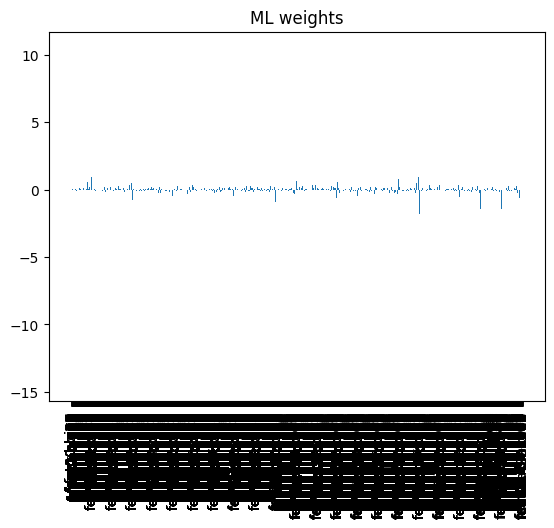

num of zero weights:  890
num of non-zero weights:  21486
              Feature     Weight
0          feat0-bin1   0.147084
1          feat0-bin2   0.099102
2          feat0-bin3   0.117324
3          feat0-bin4   0.075989
4          feat0-bin5   0.080305
...               ...        ...
22371  feat21-bin1015   0.450788
22372  feat21-bin1016   1.324801
22373  feat21-bin1017   3.436580
22374     feat22-bin1 -12.624163
22375     feat22-bin2 -14.451775

[21486 rows x 2 columns]


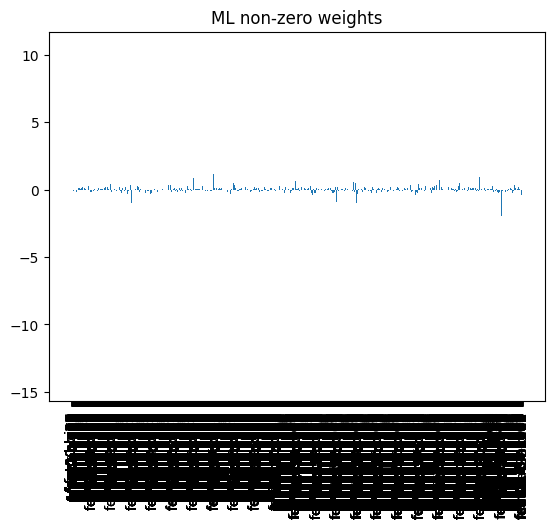


evaluate
encoding test set
[[0 0 0]
 [1 1 0]
 [1 0 0]
 ...
 [1 1 0]
 [1 0 0]
 [1 1 1]]
predicted labels (before mapping):  [0 2 1 1 2 2 1 1 2 3 2 3 2 1 2 0 2 2 2 1 2 2 2 3 2 2 2 2 3 3 1 3 3 2 2 3 3
 3 1 1 3 3 2 1 1 1 2 3 1 2 2 2 2 2 2 0 2 2 2 0 2 2 1 2 3 2 2 3 2 2 1 2 2 3
 1 2 2 2 2 2 0 2 1 3 3 2 3 2 3 2 3 3 2 1 2 1 3 1 2 3 3 2 2 2 2 0 1 1 2 1 3
 2 3 1 3 1 2 2 1 2 2 2 3 2 0 0 3 2 2 3 3 2 3 1 2 2 3 0 2 1 3 2 2 2 0 3 2 2
 2 3 0 2 2 0 2 2 0 2 3 3 2 0 3 0 2 2 2 1 1 1 1 1 2 2 2 0 1 3 2 1 2 1 2 3 2
 3 2 1 3 3 1 3 2 0 2 2 1 1 2 3 1 1 1 2 2 1 2 1 2 3 3 3 2 1 0 1 1 2 1 1 1 2
 2 0 2 1 2 2 0 2 2 2 1 3 1 3 1 2 1 2 2 2 2 2 2 2 2 1 1 1 1 0 3 3 3 1 3 2 2
 1 3 2 0 1 3 1 3 3 1 2 2 2 1 3 2 2 2 2 3 3 2 3 2 2 2 0 2 1 2 2 2 0 2 3 3 2
 0 2 0 3 2 3 3 3 3 3 2 2 2 2 2 1 1 2 2 3 1 2 1 3 0 3 2 2 2 1 1 1 2 2 2 2 0
 1 2 3 2 2 1 3]
      predictions  true values
51              0            1
1099            2            1
1311            1            3
514             1            2
926             2            2

In [14]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                mapping=mapping,
                num_nonzero_weights=num_nonzero_weights)

_, infbins_accuracy = scorecard.evaluate()
end_time = time.time()
print(f'Execution time: {end_time - start_time} seconds')

CAIM, accuracy: 0.49117647058823527, sparsity: 45
threshold: 0.1, accuracy: 0.7686274509803922, sparsity: 9033
threshold: 0.01, accuracy: 0.7941176470588235, sparsity: 19360
threshold: 0.001, accuracy: 0.7941176470588235, sparsity: 20924
threshold: 0.0001, accuracy: 0.7941176470588235, sparsity: 21396
threshold: 0, accuracy: 0.7941176470588235, sparsity: 21486
infbins, accuracy: 0.47058823529411764, sparsity: 21486


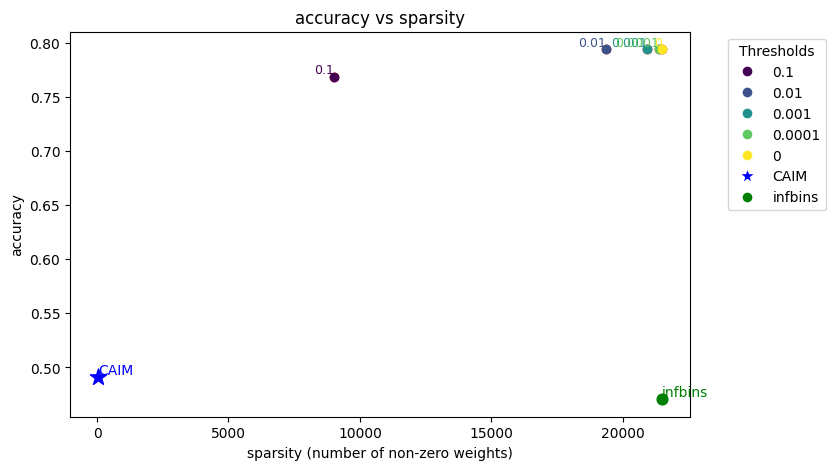

In [15]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights, infbins_accuracy, scorecard.nonzero_weights.shape[0])

## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

In [16]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
print(wine_quality_data.metadata) 
  
# variable information 
print(wine_quality_data.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [17]:
wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')

In [18]:
wine_quality_y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Text(0.5, 1.0, 'distribution of wine quality')

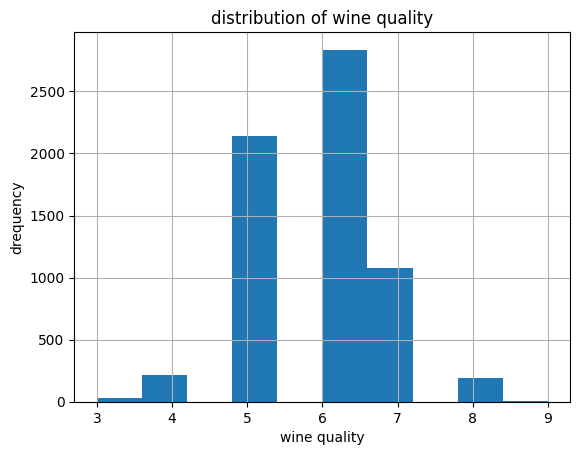

In [19]:
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')

In [20]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")

Categorical columns: []


SBC reduction of train set
number of features:  11
original num target classes:  7
original num observations:  4872
new num features:  12
new num target classes:  2
new num observations:  29232  (original num observations * 6 )
     0     1     2    3      4     5     6        7     8     9   10   11  \
0  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  0.0   
1  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  1.0   
2  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  2.0   
3  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  3.0   
4  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  4.0   

   binary_label  
0             1  
1             1  
2             1  
3             1  
4             1  

SBC reduction of test set
number of features:  11
original num target classes:  7
original num observations:  1625
new num features:  12
new num target classes:  2
new num observations:  9750  (origin

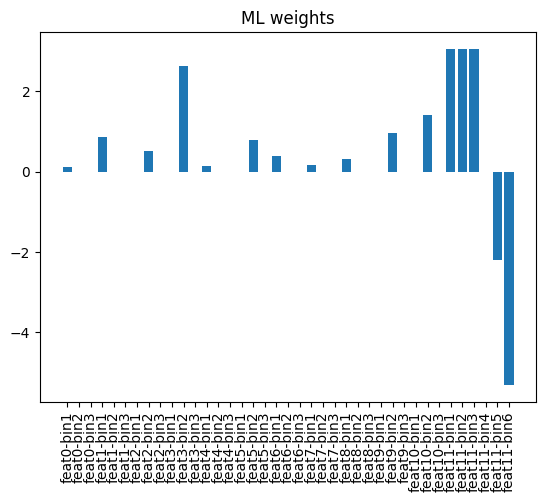

num of zero weights:  23
num of non-zero weights:  16
        Feature    Weight
0    feat0-bin1  0.119190
3    feat1-bin1  0.855822
7    feat2-bin2  0.514227
10   feat3-bin2  2.625962
12   feat4-bin1  0.146203
16   feat5-bin2  0.795649
18   feat6-bin1  0.399146
21   feat7-bin1  0.173443
24   feat8-bin1  0.306196
28   feat9-bin2  0.962116
31  feat10-bin2  1.415533
33  feat11-bin1  3.059824
34  feat11-bin2  3.059816
35  feat11-bin3  3.059856
37  feat11-bin5 -2.210133
38  feat11-bin6 -5.318473


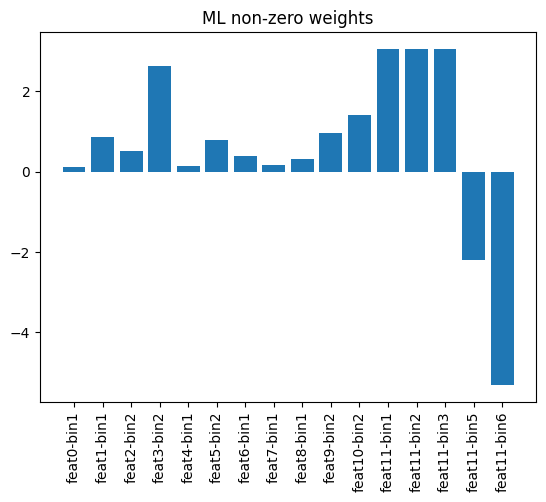


evaluate
encoding test set
X_disc shape:  (9750, 39)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin2', 'feat0-bin3', 'feat1-bin1', 'feat1-bin2',
       'feat1-bin3', 'feat2-bin1', 'feat2-bin2', 'feat2-bin3', 'feat3-bin1',
       'feat3-bin2', 'feat3-bin3', 'feat4-bin1', 'feat4-bin2', 'feat4-bin3',
       'feat5-bin1', 'feat5-bin2', 'feat5-bin3', 'feat6-bin1', 'feat6-bin2',
       'feat6-bin3', 'feat7-bin1', 'feat7-bin2', 'feat7-bin3', 'feat8-bin1',
       'feat8-bin2', 'feat8-bin3', 'feat9-bin1', 'feat9-bin2', 'feat9-bin3',
       'feat10-bin1', 'feat10-bin2', 'feat10-bin3', 'feat11-bin1',
       'feat11-bin2', 'feat11-bin3', 'feat11-bin4', 'feat11-bin5',
       'feat11-bin6'],
      dtype='object')
X_disc head:     feat0-bin1  feat0-bin2  feat0-bin3  feat1-bin1  feat1-bin2  feat1-bin3  \
0           1           0           0           1           0           0   
1           1           0           0           1           0           0   
2           1           0           0      

In [21]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [22]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 16


SBC reduction of train set
number of features:  11
original num target classes:  7
original num observations:  4872
new num features:  12
new num target classes:  2
new num observations:  29232  (original num observations * 6 )
     0     1     2    3      4     5     6        7     8     9   10   11  \
0  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  0.0   
1  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  1.0   
2  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  2.0   
3  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  3.0   
4  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  4.0   

   binary_label  
0             1  
1             1  
2             1  
3             1  
4             1  

SBC reduction of test set
number of features:  11
original num target classes:  7
original num observations:  1625
new num features:  12
new num target classes:  2
new num observations:  9750  (origin

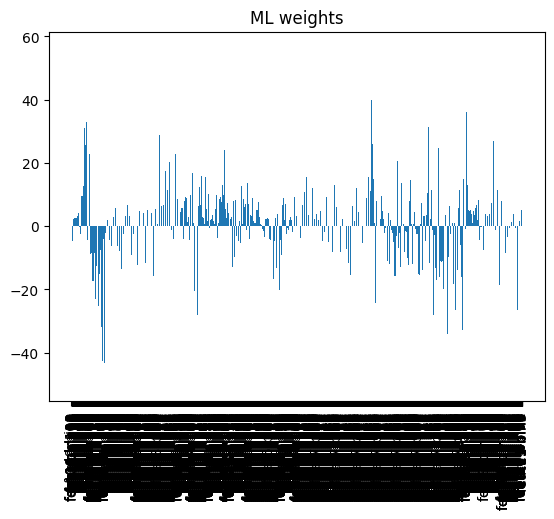

num of zero weights:  249
num of non-zero weights:  2230
          Feature     Weight
1     feat0-bin10  15.360953
5     feat0-bin11  13.025381
6     feat0-bin12  -4.849954
7     feat0-bin13   4.071679
8     feat0-bin14  -0.966485
...           ...        ...
2474  feat11-bin1   5.226189
2475  feat11-bin2   5.225829
2476  feat11-bin3  -8.133144
2477  feat11-bin4 -15.139474
2478  feat11-bin5 -27.011967

[2230 rows x 2 columns]


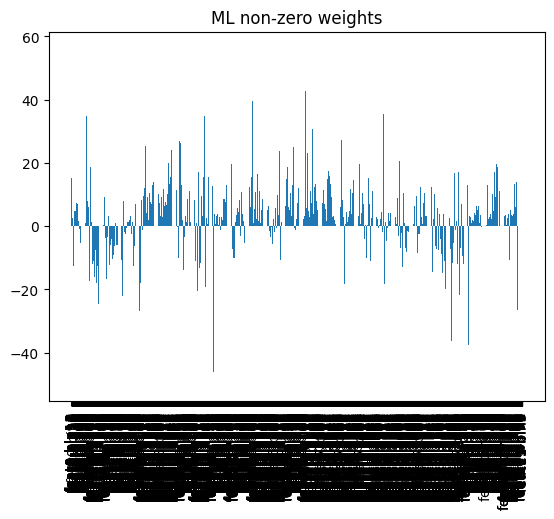


evaluate
encoding test set
X_disc shape:  (9750, 2479)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin10', 'feat0-bin100', 'feat0-bin101',
       'feat0-bin102', 'feat0-bin11', 'feat0-bin12', 'feat0-bin13',
       'feat0-bin14', 'feat0-bin15',
       ...
       'feat10-bin95', 'feat10-bin96', 'feat10-bin97', 'feat10-bin98',
       'feat10-bin99', 'feat11-bin1', 'feat11-bin2', 'feat11-bin3',
       'feat11-bin4', 'feat11-bin5'],
      dtype='object', length=2479)
X_disc head:     feat0-bin1  feat0-bin10  feat0-bin100  feat0-bin101  feat0-bin102  \
0           0            0             0             0             0   
1           0            0             0             0             0   
2           0            0             0             0             0   
3           0            0             0             0             0   
4           0            0             0             0             0   

   feat0-bin11  feat0-bin12  feat0-bin13  feat0-bin14  feat0-bin15  ...  \
0        

In [23]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=18)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

SBC reduction of train set
number of features:  11
original num target classes:  7
original num observations:  4872
new num features:  12
new num target classes:  2
new num observations:  29232  (original num observations * 6 )
     0     1     2    3      4     5     6        7     8     9   10   11  \
0  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  0.0   
1  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  1.0   
2  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  2.0   
3  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  3.0   
4  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  4.0   

   binary_label  
0             1  
1             1  
2             1  
3             1  
4             1  

SBC reduction of test set
number of features:  11
original num target classes:  7
original num observations:  1625
new num features:  12
new num target classes:  2
new num observations:  9750  (origin

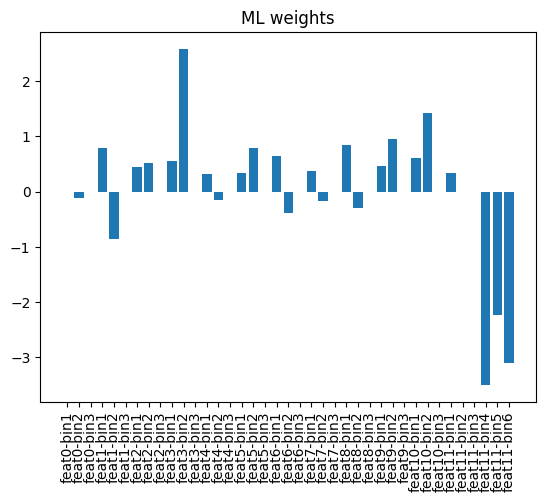

num of zero weights:  13
num of non-zero weights:  26
        Feature    Weight
0    feat0-bin1  0.000084
1    feat0-bin2 -0.115734
3    feat1-bin1  0.797242
4    feat1-bin2 -0.852611
6    feat2-bin1  0.451364
7    feat2-bin2  0.516394
9    feat3-bin1  0.550739
10   feat3-bin2  2.584899
12   feat4-bin1  0.327121
13   feat4-bin2 -0.144628
15   feat5-bin1  0.329318
16   feat5-bin2  0.797498
18   feat6-bin1  0.649189
19   feat6-bin2 -0.394142
21   feat7-bin1  0.371671
22   feat7-bin2 -0.167279
24   feat8-bin1  0.835964
25   feat8-bin2 -0.290977
27   feat9-bin1  0.472829
28   feat9-bin2  0.961197
30  feat10-bin1  0.602110
31  feat10-bin2  1.419390
33  feat11-bin1  0.338261
36  feat11-bin4 -3.496485
37  feat11-bin5 -2.228552
38  feat11-bin6 -3.101810


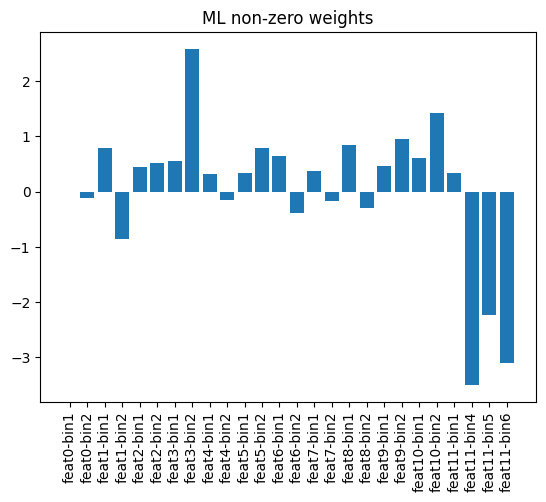


evaluate
encoding test set
[[1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]
 ...
 [1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]]
predicted labels (before mapping):  [6 5 6 ... 6 5 6]
      predictions  true values
3103            6            8
1419            5            5
4761            6            7
4690            5            6
4032            5            6
1297            6            6
1773            6            5
5584            6            6
561             5            5
5946            6            7
mse:  0.6793846153846154
accuracy:  0.5132307692307693
Execution time: 37.133261919021606 seconds


In [24]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [25]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 26


SBC reduction of train set
number of features:  11
original num target classes:  7
original num observations:  4872
new num features:  12
new num target classes:  2
new num observations:  29232  (original num observations * 6 )
     0     1     2    3      4     5     6        7     8     9   10   11  \
0  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  0.0   
1  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  1.0   
2  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  2.0   
3  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  3.0   
4  7.2  0.39  0.32  1.8  0.065  34.0  60.0  0.99714  3.46  0.78  9.9  4.0   

   binary_label  
0             1  
1             1  
2             1  
3             1  
4             1  

SBC reduction of test set
number of features:  11
original num target classes:  7
original num observations:  1625
new num features:  12
new num target classes:  2
new num observations:  9750  (origin

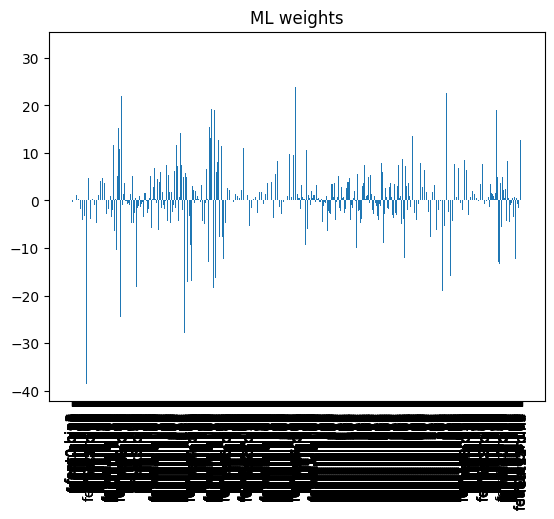

num of zero weights:  57
num of non-zero weights:  2422
          Feature    Weight
0      feat0-bin1 -1.118867
1      feat0-bin2 -1.087495
2      feat0-bin3  0.192739
3      feat0-bin4 -0.177668
4      feat0-bin5 -0.232013
...           ...       ...
2474  feat11-bin1 -1.494960
2475  feat11-bin2 -2.736137
2476  feat11-bin3 -9.218890
2477  feat11-bin4 -4.904047
2478  feat11-bin5 -7.750622

[2422 rows x 2 columns]


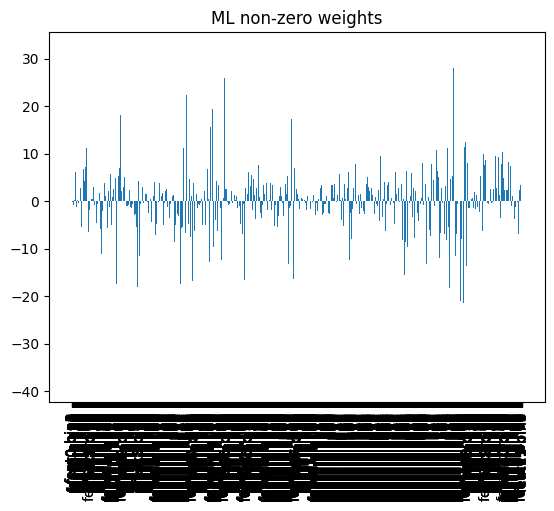


evaluate
encoding test set
[[1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]
 ...
 [1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]]
predicted labels (before mapping):  [6 5 6 ... 6 5 5]
      predictions  true values
3103            6            8
1419            5            5
4761            6            7
4690            5            6
4032            5            6
1297            6            6
1773            6            5
5584            6            6
561             6            5
5946            6            7
mse:  0.9218461538461539
accuracy:  0.496
Execution time: 439.2703700065613 seconds


In [26]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

In [ ]:
# fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

In [ ]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [ ]:
car_evaluation_y.value_counts()

In [ ]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

In [ ]:
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    car_evaluation_X.loc[:, col] = car_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {car_evaluation_X[col].unique()}")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_infbins_1ook_ml_model, car_infbins_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcoding_ml_model, car_caim_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
car_infbins_diffcoding_ml_model, car_infbins_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## abalone
predict the age of abalone from physical measurements?

https://archive.ics.uci.edu/dataset/1/abalone

In [ ]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
print(abalone_data.metadata) 
  
# variable information 
print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['Rings'], name='Rings')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')

In [ ]:
categorical_columns = abalone_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    abalone_X.loc[:, col] = abalone_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {abalone_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_ml_model, abalone_caim_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_ml_model, abalone_infbins_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=10)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcoding_ml_model, abalone_caim_diffcoding_ml_weights = scorecard.fit(abalone_X, abalone_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
abalone_infbins_diffcoding_ml_model, abalone_infbins_diffcoding_ml_weights = scorecard.fit(abalone_X, abalone_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## balance scale
classify each example as having the balance scale tip to the right, tip to the left, or be balanced (from 1 to 5)

https://archive.ics.uci.edu/dataset/12/balance+scale

In [ ]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = balance_scale_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    balance_scale_X.loc[:, col] = balance_scale_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {balance_scale_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_caim_1ook_ml_model, balance_scale_caim_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_infbins_1ook_ml_model, balance_scale_infbins_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_caim_diffcoding_ml_model, balance_scale_caim_diffcoding_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
balance_scale_infbins_diffcoding_ml_model, balance_scale_infbins_diffcoding_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## lenses

classes:
- 1 : the patient should be fitted with hard contact lenses,
- 2 : the patient should be fitted with soft contact lenses,
- 3 : the patient should not be fitted with contact lenses.


https://archive.ics.uci.edu/dataset/58/lenses

In [ ]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = lenses_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    lenses_X.loc[:, col] = lenses_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {lenses_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_ml_model, lenses_caim_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_ml_model, lenses_infbins_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcoding_ml_model, lenses_caim_diffcoding_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcoding_ml_model, lenses_infbins_diffcoding_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## student performance
predict student performance in secondary education (high school)

https://archive.ics.uci.edu/dataset/320/student+performance

In [ ]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
  
# metadata 
print(student_performance_data.metadata) 
  
# variable information 
print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y['G1'], name='G1')
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = student_performance_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    student_performance_X.loc[:, col] = student_performance_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {student_performance_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_caim_1ook_ml_model, student_performance_caim_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_infbins_1ook_ml_model, student_performance_infbins_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,   
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_caim_diffcoding_ml_model, student_performance_caim_diffcoding_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_infbins_diffcoding_ml_model, student_performance_infbins_diffcoding_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,   
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")